# Contents

1. Import Libraries and Data Set
2. Create a data subset
3. Create a line chart
4. Decompose the time series
5. Conduct a Dickey-Fuller Test 
6. Conduct Differencing on the data 
7. Check for autocorrelations

# Import Libraries and Data Set

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings 
import statsmodels.api as sm

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
# Create a path 
path = r'/Users/ATeam/Desktop/CF/Achievement 6 - Applied analytics/Air Pollution'

In [3]:
# Import data set 
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'air_pollution_2.csv'))

In [4]:
# Check data frame 
df.head()

,Unnamed: 0.1,Unnamed: 0,Country,Code,Year,Air pollution total deaths,Indoor air pollution deaths,Outdoor particule matter deaths,Outdoor ozone pollution deaths
0,0,0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,1,1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,2,2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,3,3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,4,4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


In [5]:
# Drop column 'Unnamed: 0.1'
df.drop(columns=['Unnamed: 0.1'], inplace=True)

In [6]:
#Drop column 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
#Check columns were dropped correctly 
df.head()

,Country,Code,Year,Air pollution total deaths,Indoor air pollution deaths,Outdoor particule matter deaths,Outdoor ozone pollution deaths
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


# Create a data subset

In [19]:
# Create a data subset 
df_sub = df.groupby('Year') [['Air pollution total deaths']].sum()

In [20]:
# Check the subset
df_sub.head(50)

,Air pollution total deaths
Year,
1990,24737.753176
1991,24467.903027
1992,24278.044790
1993,24146.497833
1994,23945.211429
1995,23603.295872
1996,23319.389378
1997,22991.678115
1998,22629.042163


# Create a line chart

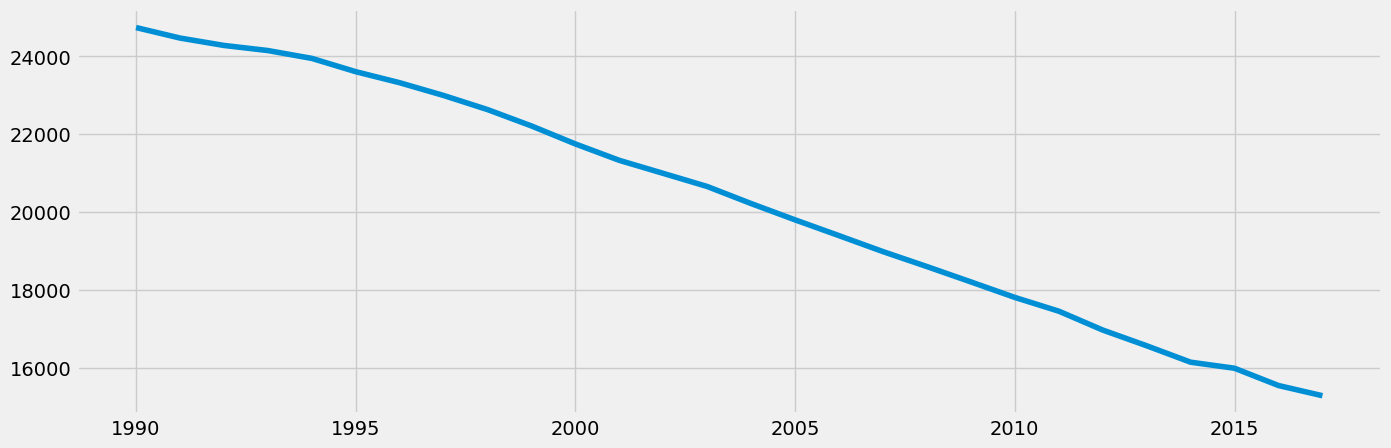

In [34]:
# Create a line chart
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

# Decompose the time series

In [43]:
# Decompose the time series 
decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

Because the 'year' column was set to the index then I created my subset, I could not apply the datatime index to it. Therefore, I have to find another to set this index or I have to specify a period. Can you guide me here, then I'll run the decomposition? Thanks!

# Conduct a Dickey-Fuller test

In [46]:
# Conduct a Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(df_sub['Air pollution total deaths'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.132790
p-value                         0.968230
Number of Lags Used             3.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


The test statistic is larger than the critical value, therefore we cannot reject the null hypothesis based on this test. Making this data non-stationary. The p-value indicates the results are insignificant. 

# Conduct Differencing on the data 

In [48]:
# Calculate the difference between the values and their lags
data_diff = df_sub - df_sub.shift(1)

In [49]:
# Remove missing values
data_diff.dropna(inplace = True)

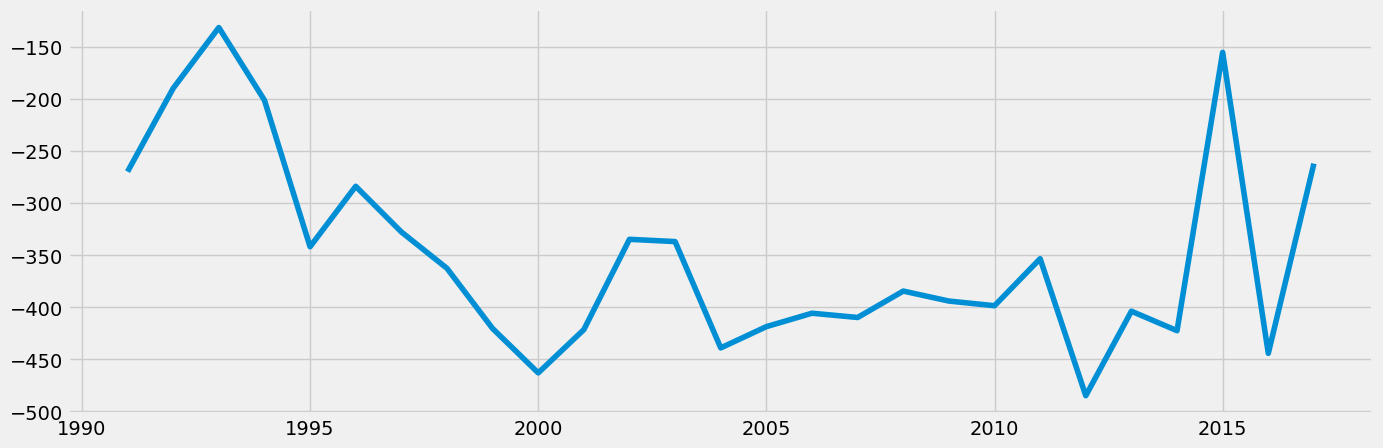

In [50]:
# Re-run time series after differencing 
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [51]:
# Conduct another dickey-fuller test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.273595
p-value                         0.016101
Number of Lags Used             2.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


The test statistic is now smaller than the criitcal value, so we can reject the null hypothesis. The p-value of .01 also indicates a significant result. 

# Check for Autocorrelations

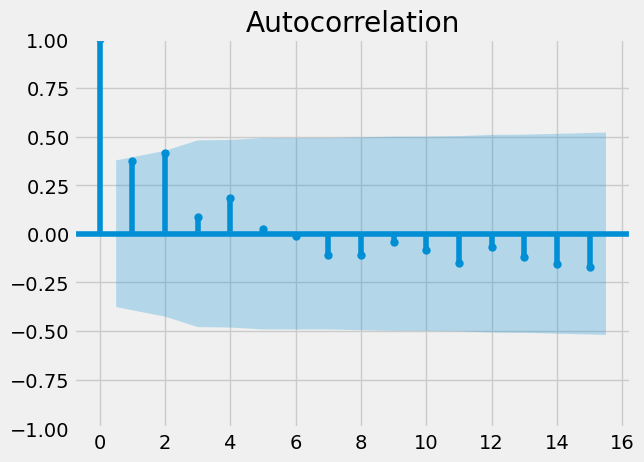

In [55]:
# Check the data's autocorrelations
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_diff)
plt.show()

As only one line is outside of the blue confidence level, this indicates stationarity is strong. 